<a href="https://colab.research.google.com/github/jakeyk11/ml-models-collection/blob/main/Kaggle%20-%20Restaurant%20Recommender%20System/restaurant_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Recommender System

## Step 1 - Data Import and Process

Import all required package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools as ft

Notebook is hosted in google collab. So mount google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import restaurant data and user data

In [ ]:
# Set path
path = 'drive/MyDrive/Colab Notebooks/Datasets/Restaurant Data with Consumer Ratings/'

# Restaurant data
rest_cuisine_in = pd.read_csv(path + 'chefmozcuisine.csv')
rest_payments_in = pd.read_csv(path + 'chefmozaccepts.csv')
rest_parking_in = pd.read_csv(path + 'chefmozparking.csv')
rest_hours_in = pd.read_csv(path + 'chefmozhours4.csv')
rest_loc_in = pd.read_csv(path + 'geoplaces2.csv')

# User data
user_profile_in = pd.read_csv(path + 'userprofile.csv')
user_payment_in = pd.read_csv(path + 'userpayment.csv')
user_cuisine_in = pd.read_csv(path + 'usercuisine.csv')

# Ratings
user_ratings_in = pd.read_csv(path + 'rating_final.csv')


### Restaurant Cuisine
First we investigate restaurant cuisines. We apply one-hot encoding to tag restaurants against one or more appropriate cuisines.

In [ ]:
rest_cuisine_in.head(5)

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [ ]:
rest_cuisine = pd.get_dummies(rest_cuisine_in, columns=['Rcuisine'])
rest_cuisine = rest_cuisine.groupby('placeID',as_index=False).sum().set_index('placeID')
rest_cuisine.head(5)

,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Barbecue,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
placeID,,,,,,,,,,,,,,,,,,,,,
132001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Look at count of restaurants against each cuisine. Also look at restaurants that are tagged against a large number of cuisines.

<Axes: >

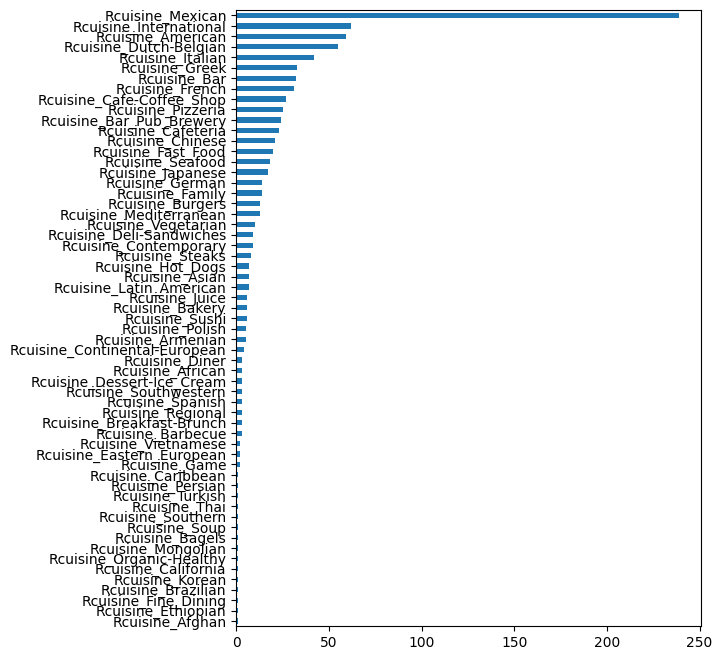

In [ ]:
ax = plt.figure(figsize=(6,8))
rest_cuisine.sum().sort_values().plot.barh()

<Axes: ylabel='placeID'>

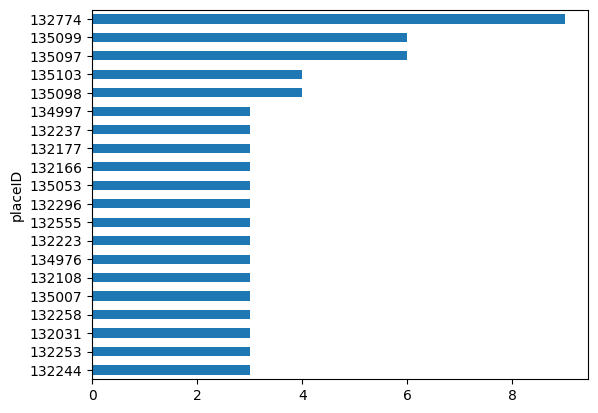

In [ ]:
rest_num_cuisines = rest_cuisine.sum(axis=1).sort_values()
rest_num_cuisines.tail(20).plot.barh()

### Restaurant Parking

Look at restaurant parking. The type of parking available isn't perceived to be important, so we generate a binary parking/no parking feature.

In [ ]:
rest_parking_in.head(5)

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [ ]:
rest_parking = rest_parking_in[['placeID']].copy()
rest_parking['parking'] = rest_parking_in['parking_lot'].apply(lambda x: 0 if x =='none' else 1)
rest_parking = rest_parking.groupby('placeID').max()
rest_parking.head(5)

,parking
placeID,
132012,1
132023,1
132024,1
132026,1
132030,1


<BarContainer object of 2 artists>

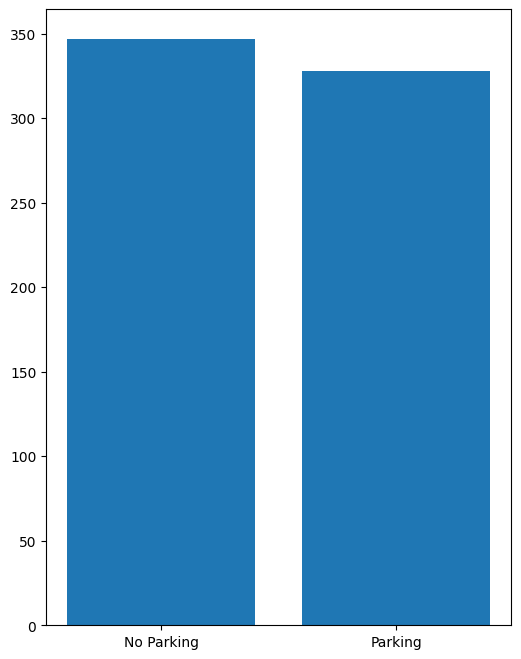

In [ ]:
ax = plt.figure(figsize=(6,8))
plt.bar(['No Parking','Parking'], [len(rest_parking[rest_parking['parking']==0]), len(rest_parking[rest_parking['parking']==1])])

### Restaurant payments accepted

Look at restaurant payments accepted. Applying existing understanding of what might be perceived as important from a customer perspective, the following payment conditions may be key:
- Takes AMEX
- Takes card and cash
- Cash only
- Accepts some form of membership/value card

In [ ]:
rest_payments_in.head(5)

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [ ]:
rest_payments = pd.get_dummies(rest_payments_in, columns=['Rpayment'])
rest_payments = rest_payments.groupby('placeID',as_index=False).sum().set_index('placeID')
rest_payments.head(5)

,Rpayment_American_Express,Rpayment_Carte_Blanche,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
placeID,,,,,,,,,,,,
132002,1,0,1,0,0,1,0,1,0,0,0,0
132012,1,0,1,0,0,0,0,1,1,0,0,0
132019,1,0,1,0,0,1,0,1,0,0,0,0
132023,1,0,1,0,1,0,0,0,1,0,0,0
132024,1,0,1,0,0,0,0,1,1,0,0,0


In [ ]:
rest_payments['takes_cash'] = rest_payments['Rpayment_cash']
rest_payments['takes_card'] = rest_payments[['Rpayment_bank_debit_cards', 'Rpayment_Visa', 'Rpayment_VISA', 'Rpayment_MasterCard-Eurocard', 'Rpayment_Discover']].max(axis=1)
rest_payments['takes_amex'] = rest_payments['Rpayment_American_Express']
rest_payments['takes_clubcard'] = rest_payments['Rpayment_Diners_Club']
rest_payments = rest_payments[['takes_cash', 'takes_card', 'takes_amex', 'takes_clubcard']]
rest_payments.head(5)

,takes_cash,takes_card,takes_amex,takes_clubcard
placeID,,,,
132002,0,1,1,1
132012,0,1,1,1
132019,0,1,1,1
132023,0,1,1,1
132024,0,1,1,1


### Restaurant Location and Other details

The restaurant location data also contains very useful information regarding alcohol services, smoking area, dress code, accessibility, price, ambience and area-style. We need to encode each of the useful columns.


In [ ]:
rest_loc_in.head(5)

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [ ]:
rest_details = rest_loc_in.copy().set_index('placeID')
rest_details['alcohol'] = rest_details['alcohol'].apply(lambda x: 0 if x =='No_Alcohol_Served' else 1)
rest_details['smoking'] = rest_details['smoking_area'].apply(lambda x: 0 if x in ['none', 'not permitted'] else 1)
rest_details['dress_code'] = rest_details['dress_code'].apply(lambda x: 1 if x =='formal' else 0)
rest_details['price'] = rest_details['price'].apply(lambda x: 0 if x =='low' else 1 if x=='medium' else 2)
rest_details = rest_details[['alcohol', 'smoking', 'dress_code', 'price']]
rest_details.head(5)

,alcohol,smoking,dress_code,price
placeID,,,,
134999,0,0,0,1
132825,0,0,0,0
135106,1,1,0,1
132667,0,0,0,0
132613,0,1,0,1


### User Information
The user profiles contain some usual information about the users that might help inform the recommende

In [ ]:
user_profile_in.head(5)

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [ ]:
user_profile = user_profile_in.copy().set_index('userID')
user_profile['smoker'] = user_profile['smoker'].apply(lambda x: 1 if x == 'true' else 0)
user_profile['drink_level'] = user_profile['drink_level'].apply(lambda x: 0 if x=='abstemious' else 1 if x=='casual drinker' else 2)
user_profile['car_owner'] = user_profile['transport'].apply(lambda x: 1 if x == 'car owner' else 0)
user_profile['budget'] = user_profile['budget'].apply(lambda x: 0 if x =='low' else 1 if x=='medium' else 2)
user_profile = user_profile[['birth_year', 'smoker', 'drink_level', 'car_owner', 'budget']]
user_profile.head(5)


,birth_year,smoker,drink_level,car_owner,budget
userID,,,,,
U1001,1989,0,0,0,1
U1002,1990,0,0,0,0
U1003,1989,0,2,0,0
U1004,1940,0,0,0,1
U1005,1992,0,0,0,1


### User Ratings
The user ratings could generate features that tell us something about the user. We can combine the restuarant ratings with the cuisine types to infer average ratings for the 5 most common cuisines

In [ ]:
user_ratings = pd.merge(user_ratings_in, rest_cuisine, left_on = 'placeID', right_on = 'placeID', how = "left")
user_ratings.head(5)

,userID,placeID,rating,food_rating,service_rating,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,U1077,135085,2,2,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,U1077,135038,2,2,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U1077,132825,2,2,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U1077,135060,1,2,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,U1068,135104,1,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mean_ratings = user_ratings[['userID','rating']].groupby('userID').mean()
mean_ratings = mean_ratings.rename(columns = {'rating':'mean_rating'})
mean_ratings_mexican = user_ratings.groupby(['userID', 'Rcuisine_Mexican']).mean()[['rating']]
mean_ratings_mexican = mean_ratings_mexican.rename(columns = {'rating':'mean_rating_mex'})
mean_ratings_international = user_ratings.groupby(['userID', 'Rcuisine_International']).mean()[['rating']]
mean_ratings_international = mean_ratings_international.rename(columns = {'rating':'mean_rating_int'})
mean_ratings_american = user_ratings.groupby(['userID', 'Rcuisine_American']).mean()[['rating']]
mean_ratings_american = mean_ratings_american.rename(columns = {'rating':'mean_rating_usa'})

# Merge data
mean_ratings = pd.merge(mean_ratings, mean_ratings_mexican[mean_ratings_mexican.index.isin([1], level=1)], left_on = 'userID', right_on = 'userID', how = "left")
mean_ratings = pd.merge(mean_ratings, mean_ratings_international[mean_ratings_international.index.isin([1], level=1)], left_on = 'userID', right_on = 'userID', how = "left")
mean_ratings = pd.merge(mean_ratings, mean_ratings_american[mean_ratings_american.index.isin([1], level=1)], left_on = 'userID', right_on = 'userID', how = "left")
mean_ratings.head(5)

,mean_rating,mean_rating_mex,mean_rating_int,mean_rating_usa
userID,,,,
U1001,1.111111,2.000000,NaN,NaN
U1002,1.400000,1.333333,2.0,NaN
U1003,1.615385,2.000000,1.0,NaN
U1004,1.875000,2.000000,NaN,2.0
U1005,1.333333,NaN,NaN,NaN


## Step 2 - Process Data



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

Having explored the user and movie information, we are going to construct the input training datasets

In [ ]:
dfs = [user_ratings, user_profile, mean_ratings]
user_df = ft.reduce(lambda left, right: pd.merge(left, right, on='userID', how = 'left'), dfs)
user_df.head(5)

,userID,placeID,rating,food_rating,service_rating,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,...,Rcuisine_Vietnamese,birth_year,smoker,drink_level,car_owner,budget,mean_rating,mean_rating_mex,mean_rating_int,mean_rating_usa
0,U1077,135085,2,2,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1987,0,2,0,1,1.400,1.000000,NaN,NaN
1,U1077,135038,2,2,1,NaN,NaN,NaN,NaN,NaN,...,NaN,1987,0,2,0,1,1.400,1.000000,NaN,NaN
2,U1077,132825,2,2,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1987,0,2,0,1,1.400,1.000000,NaN,NaN
3,U1077,135060,1,2,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1987,0,2,0,1,1.400,1.000000,NaN,NaN
4,U1068,135104,1,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1988,0,1,0,0,0.625,0.666667,NaN,NaN


In [ ]:
dfs = [user_ratings[['placeID', 'rating']], rest_parking, rest_details, rest_payments, rest_cuisine]
item_df = ft.reduce(lambda left, right: pd.merge(left, right, on='placeID', how = 'left'), dfs)
item_df.head(5)

,placeID,rating,parking,alcohol,smoking,dress_code,price,takes_cash,takes_card,takes_amex,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,135085,2,1,0,0,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,135038,2,0,0,1,0,1,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132825,2,0,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135060,1,0,0,0,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135104,1,1,1,0,0,1,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now define a processing pipeline to enable repeatable processing on user features. Identify features that will be used to train the recommender system based on prior analysis.

In [ ]:
user_continous_features = ['birth_year', 'smoker', 'car_owner', 'budget','drink_level', 'mean_rating', 'mean_rating_mex', 'mean_rating_int', 'mean_rating_usa']


Construct user processing pipeline. We will scale numeric features using standard scaling and then replace NaN with 0. Completing in this order means that null ratings are effectively assigned an average rating as opposed to a rating of 0.

In [ ]:
# Combine transformers into a feature pre-processing pipeline, which also drops non-required columns
user_num_transformer = Pipeline(steps =
                           [('scaler', StandardScaler()),
                            ('null_replacer', SimpleImputer(fill_value = 0.0))])

user_preprocessor = ColumnTransformer(transformers =
                                 [('num', user_num_transformer, user_continous_features)],
                                   remainder = 'drop')
user_pipeline = Pipeline(steps=
                [('user_preprocessor', user_preprocessor)])

In [ ]:
user_df_pp = user_pipeline.fit_transform(user_df)
user_df_pp = pd.DataFrame(user_df_pp, columns = user_continous_features)
user_df_pp.head(5)

,birth_year,smoker,car_owner,budget,drink_level,mean_rating,mean_rating_mex,mean_rating_int,mean_rating_usa
0,0.188079,-0.487586,-0.607539,0.304340,1.305432,0.369138,-0.337453,-8.799291e-17,1.029772e-16
1,0.188079,-0.487586,-0.607539,0.304340,1.305432,0.369138,-0.337453,-8.799291e-17,1.029772e-16
2,0.188079,-0.487586,-0.607539,0.304340,1.305432,0.369138,-0.337453,-8.799291e-17,1.029772e-16
3,0.188079,-0.487586,-0.607539,0.304340,1.305432,0.369138,-0.337453,-8.799291e-17,1.029772e-16
4,0.249434,-0.487586,-0.607539,-1.419263,0.055962,-1.060040,-0.832018,-8.799291e-17,1.029772e-16


Construct item processing pipeline, which will simply replace null values with 0 and then scale.

In [ ]:
if 'placeId' in item_df.columns.tolist():
  item_df = item_df.drop(columns = ['placeID'])

if 'rating' in item_df.columns.tolist():
  item_df = item_df.drop(columns = ['rating'])

item_num_transformer = Pipeline(steps =
                           [('null_replacer', SimpleImputer(fill_value = 0.0)),
                            ('scaler', StandardScaler())
                            ])

item_preprocessor = ColumnTransformer(transformers =
                                 [('num', item_num_transformer, item_df.columns.tolist())],
                                   remainder = 'drop')
item_pipeline = Pipeline(steps=
                [('item_preprocessor', item_preprocessor)])

In [ ]:
item_df_pp = item_pipeline.fit_transform(item_df)
item_df_pp = pd.DataFrame(item_df_pp, columns = item_df.columns.tolist())
item_df_pp.head(5)

,placeID,parking,alcohol,smoking,dress_code,price,takes_cash,takes_card,takes_amex,takes_clubcard,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,0.811455,0.966954,-0.723617,-0.590281,-0.11048,0.142295,0.06435,-0.956243,-0.557959,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.593455e-02
1,0.768744,-1.034175,-0.723617,1.694107,-0.11048,0.142295,0.06435,-0.956243,-0.557959,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210705e-17
2,-1.242266,-1.034175,-0.723617,-0.590281,-0.11048,-1.281878,0.06435,-0.956243,-0.557959,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.593455e-02
3,0.788736,-1.034175,-0.723617,-0.590281,-0.11048,0.142295,0.06435,-0.956243,-0.557959,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.593455e-02
4,0.828720,0.966954,1.381946,-0.590281,-0.11048,0.142295,0.06435,1.144323,-0.557959,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.593455e-02


Finally, process the output ratings

In [ ]:
y = user_ratings[['rating']]
scalerTarget = MinMaxScaler((-1, 1))
y_pp = scalerTarget.fit_transform(y)
y_pp

array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [ 0.],
       [ 0.],
       [-1.]])

## Step 3 - Split Dataset into Train and Test Datasets

In [ ]:
from sklearn.model_selection import train_test_split

We must split the item dataset, user dataset and rating dataset. We use a random_state parameter to ensure that all are split consistently.

In [ ]:
item_train_df, item_test_df = train_test_split(item_df_pp, train_size=0.80, shuffle=True, random_state=1)
user_train_df, user_test_df = train_test_split(user_df_pp, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test = train_test_split(y_pp, train_size=0.80, shuffle=True, random_state=1)

Check that the user and item data has been split consistenly

In [ ]:
user_train_df.head(5)

,birth_year,smoker,car_owner,budget,drink_level,mean_rating,mean_rating_mex,mean_rating_int,mean_rating_usa
1102,0.188079,-0.487586,1.645985,0.304340,1.305432,-0.599015,6.529312e-17,-8.799291e-17,1.029772e-16
814,0.372143,2.050921,-0.607539,-1.419263,0.055962,-0.631945,-3.374533e-01,-8.799291e-17,-3.545506e-01
525,0.433497,2.050921,1.645985,0.304340,1.305432,0.092523,1.571111e-01,-8.799291e-17,1.029772e-16
1044,0.310788,-0.487586,1.645985,0.304340,-1.193507,-2.212603,-1.821146e+00,-2.021304e+00,-1.785193e+00
439,0.372143,-0.487586,-0.607539,-1.419263,1.305432,-0.200857,-1.821146e+00,-6.468173e-01,1.076092e+00


In [ ]:
item_train_df.head(5)

,placeID,parking,alcohol,smoking,dress_code,price,takes_cash,takes_card,takes_amex,takes_clubcard,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
1102,0.776923,0.966954,1.381946,1.694107,-0.11048,1.566467,0.06435,1.144323e+00,-5.579590e-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210705e-17
814,0.792371,0.966954,-0.723617,-0.590281,-0.11048,1.566467,0.06435,1.144323e+00,-5.579590e-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210705e-17
525,0.776923,0.966954,1.381946,1.694107,-0.11048,1.566467,0.06435,1.144323e+00,-5.579590e-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210705e-17
1044,0.793280,-1.034175,1.381946,1.694107,-0.11048,1.566467,0.06435,1.144323e+00,1.961167e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210705e-17
439,0.832355,-1.034175,-0.723617,-0.590281,-0.11048,-1.281878,0.00000,1.166048e-16,6.991979e-17,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210705e-17


## Step 4 - Construct Neural Network for Content Based Filtering

In [ ]:
import tensorflow as tf

Given the user input, x_u, we must create a vector v_u that represents the user features. Likewise given the item input, x_m, we must create a vector v_m that represents the item features. The predicted rating will then be given by the dot product of v_u and v_m.

Creating a user network and item network enables us to easily create the representative vectors, v_u and v_m, which must be the same shape. We then take the dot product of the neural network outputs to make a prediction.

In [ ]:
num_outputs = 32
num_user_features = user_train_df.shape[1]
num_item_features = item_train_df.shape[1]

user_NN = tf.keras.models.Sequential([
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(num_outputs, activation='linear'),
])

item_NN = tf.keras.models.Sequential([
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(num_outputs, activation='linear'),
])

# Create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# Create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# Compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# Specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 9)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 69)]                 0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32)                   39584     ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 32)                   54944     ['input_2[0][0]']             
                                                                                              

Define a mean squared error loss function and an Adam optimizer.

In [ ]:
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

Fit the model

In [ ]:
model.fit([user_train_df[:], item_train_df[:]], y_train, epochs=20)

Epoch 1/20
29/29 [==============================] - 2s 4ms/step - loss: 0.4216
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3408
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3235
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.3035
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3029
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.2949
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 8/20
29/29 [==============================] - 0s 5ms/step - loss: 0.2916
Epoch 9/20
29/29 [==============================] - 0s 4ms/step - loss: 0.2779
Epoch 10/20
29/29 [==============================] - 0s 4ms/step - loss: 0.2608
Epoch 11/20
29/29 [==============================] - 0s 4ms/step - loss: 0.2640
Epoch 12/20
29/29 [==============================] - 0s 4ms/step - loss: 0.2592
Epoch 13/20
29/29 [==============================

In [ ]:
model.evaluate([user_test_df[:], item_test_df[:]], y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.3607


0.36074402928352356

Loss on test data is comparable to loss on training data, and it is therefore unlikely that over-fitting has occured.

## Step 5 - Make Recommendations for New User

Let's try out the recommender system by creating a new user and making a prediction on which restaurants they would most likely rate highly.

In [ ]:
user_id= 'Jake Kolliari'
birth_year = 1995
smoker = 0              # Represents "no"
car_owner = 1           # Represents "yes"
budget = 1              # Represents "medium"
drink_level = 1         # Represents "casual drinker"

new_user_df = pd.DataFrame(index = [user_id], columns = user_continous_features)

new_user_df['birth_year'] = birth_year
new_user_df['smoker'] = smoker
new_user_df['car_owner'] = car_owner
new_user_df['budget'] = budget
new_user_df['drink_level'] = drink_level

# The new user has not rated anything yet, so assign nulls to rating features
new_user_df['mean_rating'] = np.nan
new_user_df['mean_rating_mex'] = np.nan
new_user_df['mean_rating_int'] = np.nan
new_user_df['mean_rating_usa'] = np.nan

new_user_df


,birth_year,smoker,car_owner,budget,drink_level,mean_rating,mean_rating_mex,mean_rating_int,mean_rating_usa
Jake Kolliari,1995,0,1,1,1,NaN,NaN,NaN,NaN


Put new user through processing pipeline

In [ ]:
new_user_df_pp = user_pipeline.transform(new_user_df)
new_user_df_pp = pd.DataFrame(new_user_df_pp, columns = user_continous_features)
new_user_df_pp

,birth_year,smoker,car_owner,budget,drink_level,mean_rating,mean_rating_mex,mean_rating_int,mean_rating_usa
0,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16


Generate and replicate the new user data to match the number of items in the item dataset

In [ ]:
new_user_df_pp = pd.concat([new_user_df_pp]*len(item_df_pp.drop_duplicates(ignore_index=True)),ignore_index=True)
new_user_df_pp

,birth_year,smoker,car_owner,budget,drink_level,mean_rating,mean_rating_mex,mean_rating_int,mean_rating_usa
0,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16
1,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16
2,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16
3,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16
4,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16
...,...,...,...,...,...,...,...,...,...
125,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16
126,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16
127,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16
128,0.678914,-0.487586,1.645985,0.30434,0.055962,-4.284065e-17,6.529312e-17,-8.799291e-17,1.029772e-16


Make prediction on each item for the new user

In [ ]:
y_p = model.predict([new_user_df_pp[:], item_df_pp.drop_duplicates(ignore_index=True)[:]])

# Unscale prediction
y_pu = scalerTarget.inverse_transform(y_p)

# Sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  # Negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = item_df.loc[sorted_index,:]

5/5 [==============================] - 0s 5ms/step


Present top 10 restaurants

In [ ]:
recommended_items = pd.merge(sorted_items['placeID'], rest_loc_in, on = 'placeID', how = "left")
recommended_items['pred_rating'] = sorted_ypu
recommended_items[['name','placeID','state','country','price','alcohol','pred_rating']].head(10)

,name,placeID,state,country,price,alcohol,pred_rating
0,Sanborns Casa Piedra,134996,Morelos,Mexico,medium,Wine-Beer,1.889251
1,Restaurant Bar Coty y Pablo,135019,Morelos,Mexico,low,No_Alcohol_Served,1.844232
2,El Oceano Dorado,135018,Morelos,Mexico,medium,Full_Bar,1.844110
3,Gordas de morales,132723,San Luis Potosi,Mexico,medium,Full_Bar,1.843455
4,tacos de barbacoa enfrente del Tec,132594,?,?,low,No_Alcohol_Served,1.792734
5,Restaurant Las Mananitas,134986,Morelos,Mexico,high,Wine-Beer,1.783871
6,Los Vikingos,135011,Morelos,Mexico,medium,No_Alcohol_Served,1.766623
7,Carreton de Flautas y Migadas,132740,Tamaulipas,Mexico,low,No_Alcohol_Served,1.751897
8,vips,135104,?,?,medium,Full_Bar,1.717845
9,TACOS CORRECAMINOS,132665,tamaulipas,mexico,low,No_Alcohol_Served,1.689186


Present bottom 10 restaurants

In [ ]:
recommended_items[['name','placeID','state','country','price','alcohol','pred_rating']].tail(10)

,name,placeID,state,country,price,alcohol,pred_rating
120,tacos de barbacoa enfrente del Tec,132594,?,?,low,No_Alcohol_Served,0.773298
121,Arrachela Grill,135016,Morelos,Mexico,medium,No_Alcohol_Served,0.692142
122,Restaurante El Reyecito,135046,SLP,Mexico,medium,No_Alcohol_Served,0.691283
123,Little Cesarz,132733,Tamaulipas,Mexico,medium,No_Alcohol_Served,0.689174
124,Hamburguesas La perica,132608,Tamaulipas,Mexico,low,No_Alcohol_Served,0.688954
125,carnitas_mata,132613,Tamaulipas,Mexico,medium,No_Alcohol_Served,0.688636
126,Restaurant Familiar El Chino,132767,Morelos,?,medium,Wine-Beer,0.649262
127,Vips,135001,Morelos,Mexico,medium,Wine-Beer,0.649181
128,Subway,135021,Morelos,Mexico,low,No_Alcohol_Served,0.578377
129,Restaurante la Cantina,135071,SLP,Mexico,medium,Full_Bar,0.565840
